# 01 - Data Wrangling in Python
Data Wrangling is a very important step in a Data science project. It is describes a series of processes designed to explore, transform, and validate raw datasets from their messy and complex forms into high-quality data from which we can extract meaningful insights and draw accurate conclusions.

<img src="https://online.hbs.edu/PublishingImages/6-steps-of-data-wrangling.png" width="400" height="400">

*Take the above image as a guide, but here we will not follow every step.*

## Overview
1. Discovery or Exploratory Data Analysis (EDA)
2. Data Cleaning and transformation
    * 2.1. Dealing With Missing Values
    * 2.2. Dealing With duplicates
    * 2.3. Data Reduction
    * 2.4. Dummy Variables
    * 2.5. Data Transformation with Lambda Functions
3. Data Visualization
    * 3.1. Bar charts
    * 3.2. Line charts
    * 3.3. Scatter plots
    * 3.4. Histograms
    * 3.5. Density plots
    * 3.6. Quantile-quantile plots (Q-Q plots)
    * 3.7. Boxplot or box-and-whiskers diagram
    * 3.8. Pie charts 
    * 3.9. Heatmaps
4. Data Subseting and Creation of Sample Data
    * 4.1. Creating a subset of data
    * 4.2. Create a subset of data with specific conditions
    * 4.3. Create a subset of columns and rows with .iloc and .loc
    * 4.4. Create a data sample or synthetic data
5. Advanced Data Operations in Python
    * 5.1. Data grouping (.groupby)
    * 5.2. Data concatenation (.concat)
    * 5.3. Training and testing set splitting
    * 5.4. Data merging (.merge) --> Join operations

In [1]:
# Import necessary libraries
import os
import random
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split


# Main data directory
mainpath="../data/"

## 1. Discovery or Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a method of analyzing datasets to  understand their main characteristics. It involves summarizing data features, identifying patterns, and uncovering relationships using visual and statistical techniques. EDA helps you gain insights and formulate hypotheses for further analysis.

It is recommended that EDA be performed before and after data cleansing and transformation to ensure data quality and identify potential problems.

In [2]:
filepath = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath)  # Load the data

data.head() # Show the first 5 rows of the data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.tail(2)  # shows the last 2 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


In [4]:
sorted_data = data.sort_values(["age", "fare"])  # Sorts the data by age first and then fare
print(sorted_data.head(1)["name"])  # Shows the name of the youngest person in the data
print(sorted_data.tail(1)["name"])  # Shows the name of the oldest person in the data
sorted_data.head()

763    Dean, Miss. Elizabeth Gladys "Millvina"
Name: name, dtype: object
237    Robbins, Mr. Victor
Name: name, dtype: object


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
1111,3,0,"Peacock, Master. Alfred Edward",male,0.7500,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN


In [5]:
data.groupby("sex").get_group  # Groups

<bound method BaseGroupBy.get_group of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001C00FF0A460>>

In [6]:
# I group the sorted data by gender
print(data.groupby("sex"))

In [7]:
# shows the data types of each column and the number of non-null values (to check for missing data)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
# We can check the dimensions of our dataset like:
dimensions = data.shape
print("Dimensions of our dataset: ", dimensions)  # (rows, columns)
print("Column names: ", data.columns)  # Column names
print("Column names in an array: ", data.columns.values)  # Column names inside an array
print("Column names in a list: ",data.columns.values.tolist())  # .tolist() returns a list, not an array

Dimensions of our dataset:  (1309, 14)
Column names:  Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
Column names in an array:  ['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']
Column names in a list:  ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [9]:
# Get a basic stadistical summary of our numerical variables (see how categorical variables are excluded from summary)
"""
    count: how many not null objects we have
    mean: average
    std: standard deviation
    min: minimum value
    max: maximum value
    25%: quantiles- if we sort from lowest to highest, the value that would fall in the 20% of the ordering
    50%: quantiles- if we sort from lowest to highest, the value that would fall in the 50% of the ordering
    70%: quantiles- if we sort from lowest to highest, the value that would fall in the 70% of the ordering
"""
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
# Show the data type of each column 
"""
    float64: decimal number of 64 bits
    object: string
    int64: integer number of 64 bits
"""
print(data.dtypes) 

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [11]:
# Check for duplication
data.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [12]:
# Check for missing data
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## 2. Data Cleaning and Transformation
Data cleaning is a critical step in the data science process, ensuring that raw data is accurate, consistent, and ready for analysis. Real-world data often contains errors, missing values, and inconsistencies that can compromise results. This chapter covers essential techniques and strategies for cleaning and preparing data to build a solid foundation for reliable insights and effective modeling.

### 2.1. Dealing With Missing Values
*NaN* and *None* indicate missing values.

Missing values in a dataset have two main sources:
* Data extraction
* Data collection

How do we handle missing data?
* Delete the data from the entire column/row.
* Calculate missing values: replace the NaN with another value.

In [13]:
filepath = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath)  # Load the data

# Remember our data structure
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
print(pd.isnull(data["body"]))  # tells me if the elements in the column named "body" are null (True) or not (False)
print(pd.isnull(data["body"]).values)  # same as above but the result comes inside an array

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool
[ True  True  True ... False  True  True]


In [15]:
# Percentage of missing data
(data.isnull().sum()/(len(data)))*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

How do we handle missing data?
* Delete the data from the entire column/row.
* Calculate missing values: replace the NaN with another value.

In [16]:
# Delete data
dropped_data = data.dropna(axis=0, how="all")  # delete a row (axis=0) only if all values are NaN (how=all)
print(data.shape)
print(dropped_data.shape)  # There is no row with all values as NaN
dropped_data.head(2)  # Delete a row (axis=0) only if all values are NaN (how=‘all’)

(1309, 14)
(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
# Delete data
dropped_data2 = data.dropna(axis=0,how = "any")  # delete a row (axis=0) only if any values are NaN (how=any)
print(data.shape)
print(dropped_data2.shape)  # all rows have at least one NaN value
dropped_data2.head(2)  # delete a row (axis=0) only if all values are NaN (how=‘all’)

(1309, 14)
(0, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [18]:
# Nan's computation and substitution
computed_data = data
computed_data.fillna(0)  # we replace missing values by 0; .fillna does not replace data from the original dataset
computed_data=computed_data.fillna(0)  #  now we do replace the old data

print(computed_data.isnull().sum().sum())  # Compute number of missing values in the new dataset. Should be 0
computed_data.head(2)

0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"


In [19]:
# We can substitute any NaN or Nones for the word "Unknown"
computed_data2=data
computed_data2=computed_data2.fillna("Unknown")

print(computed_data2.isnull().sum().sum())# Compute number of missing values in the new dataset. Should be 0
computed_data2.head(2)

0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON"


In [20]:
# We can even treat missing values differently depending on which column they are in
no_missing_data = data
no_missing_data["body"] = no_missing_data["body"].fillna(0)  # Substitute missing values in "body" column with 0
no_missing_data["home.dest"] = no_missing_data["home.dest"].fillna("Unknown")  # Substitute missing values in "home.dest" column with the word Unknown

print(no_missing_data["body"].isnull().sum().sum())  # Compute number of missing values in the new dataset. Should be 0
no_missing_data.head(2)

0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"


A smart thing to do with columns that store numeric values is to replace missing values with the average of the column.

In [70]:
print(pd.isnull(data["age"]).values.ravel().sum())  # 263 missing values in "age" column

no_missing_data["age"].fillna(no_missing_data["age"].mean())  # replace NaNs in "age" with column average
# no_missing_data["age"] = no_missing_data["age"].fillna(no_missing_data["age"].mean())

263


0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

Another way is to replace a missing value with the closest value above or below it.

In [21]:
no_missing_data["age"] = no_missing_data["age"].fillna(method="ffill")  # replaces missing values with the first non-Nan x value above NaN
no_missing_data["age"] = no_missing_data["age"].fillna(method="backfill")  # replaces missing values with the first non-NaN x value below NaN

In [22]:
# We can also deal with missing values using the transform method
fill_na_mean = lambda x: x.fillna(x.mean())
age_transformed = data["age"].transform(fill_na_mean)

print(data["age"].isnull().sum())  # 263 missing values in "age" column
print(age_transformed.isnull().sum())  # 0 missing values in "age" column

0
0


### 2.2. Dealing With Duplicates

In [23]:
# Shows the number of unique values in each column
data.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          122
home.dest     370
dtype: int64

### 2.3 Data Reduction
Some columns or variables may be omitted (dropped) if they do not add value to our analysis.

In [24]:
# Remove the "Embarked" column because we assume it is not relevant
reduced_data = data
reduced_data = reduced_data.drop(['embarked'], axis = 1)  # axis=0 -> row; axis=1 -> col.
reduced_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'boat', 'body', 'home.dest'],
      dtype='object')

### 2.4. Dummy Variables
For catgorical variables, such as the one that stores the ‘sex’ column (female or male), it can be useful to create a dummy variable, i.e. a variable with 2 columns based on the original. 

One for male with values 1 when male and 0 when female and a second column the other way around.

In [25]:
dummy_sex = pd.get_dummies(data["sex"], prefix="sex") # call the columns as prefix_value, in this case: sex_female and sex_male
dummy_sex.head(2)

,sex_female,sex_male
0,True,False
1,False,True


In [26]:
# Now the sex column seems redundant, so we can delete it
data_without_sex = data.drop(["sex"], axis = 1)  # axis=0->row; axis=1-> col.

# We can combine the original dataset with the dummy variables:
data_with_dummies = pd.concat([data_without_sex, dummy_sex], axis = 1)  # with axis=1 I specify that I want it to be added as a column.
data_with_dummies.head(2)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",True,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",False,True


In [27]:
# I can turn this into a function. See function ‘createDummies’.

def createDummies(df, var_name):
    dummy_var = pd.get_dummies(df[var_name], prefix=var_name)
    df=df.drop([var_name], axis = 1)
    df=pd.concat([df, dummy_var], axis = 1) 
    return df

data_good=createDummies(data, "sex")
data_good.head(2)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",True,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",False,True


### 2.5. Data Transformation with Lambda Functions

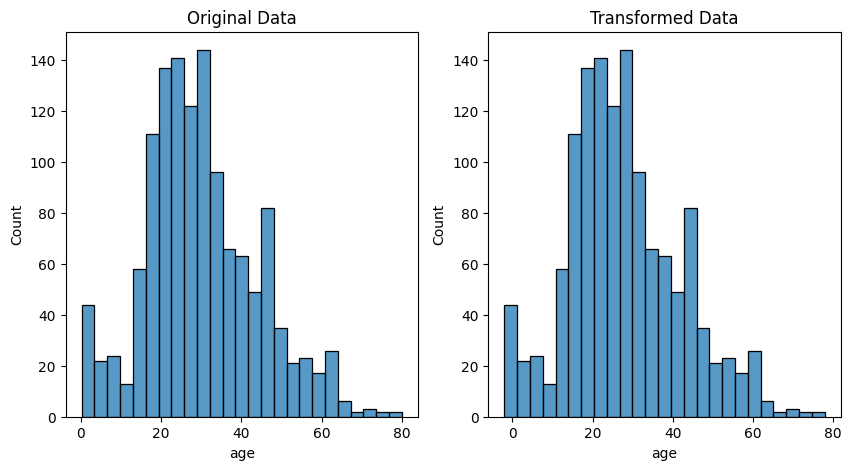

In [28]:
zscore = lambda x: (x - x.mean()/x.std())  # This custom function normalizes the data
data_transform = data["age"].transform(zscore)

# Create two subplots in 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# plot the original data
sns.histplot(data["age"], ax=ax[0])
ax[0].set_title("Original Data")
# plot the transformed data
sns.histplot(data_transform, ax=ax[1])
ax[1].set_title("Transformed Data")
plt.show()

# This is a bad example because the data was already normalized

## 3. Data Visualization
Data visualization is the process of creating images, charts, and other visual representations of data. This is done to reveal and understand underlying trends and patterns in the data. These skills are important for data scientists to tell compelling data stories.

In [29]:
filepath = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filepath)

data = pd.read_csv(fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 2.1. Bar charts
A bar chart is a versatile visual that can display categorical data or discrete quantities. It compares groups by displaying them as rectangular bars with lengths proportional to the values they represent.

* Bar charts can be **vertical or horizontal**.
* There are also many types of bar charts, including
    * **Stacked bar charts**, which display multiple bars stacked on top of each other to represent different subcategories or components within each category, 
    * **Grouped bar charts**, which display numerical data across categories that are grouped together.

*When to use:* Bar charts are great for comparing quantities across categories, showing differences over time for a small number of groups, or presenting relative proportions.

*Tips:* Start the y-axis at zero to avoid misrepresenting differences. Be sure to use appropriate scales to clearly illustrate differences in category quantities. Use horizontal bar graphs if category labels are long or if you have a large number of categories.

State
AK     3
AL     8
AR    11
AZ     4
CA     9
dtype: int64


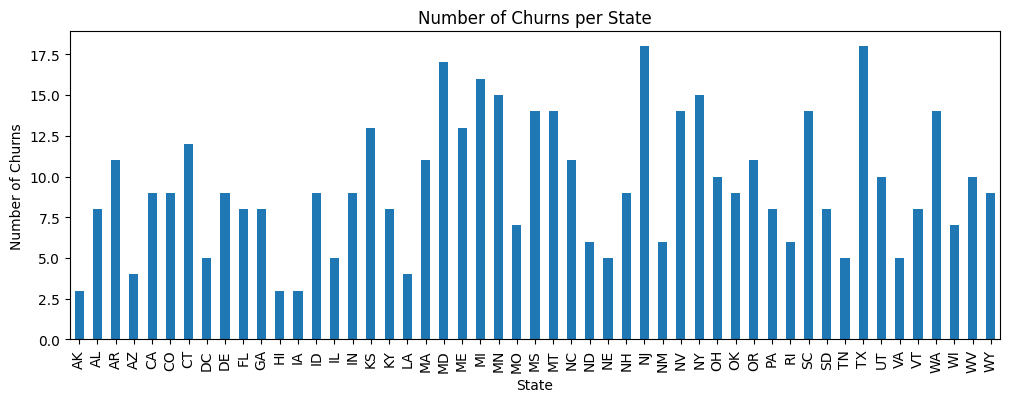

In [30]:
# First we create a dataset with the number of churns per state
churn_counts = data[data['Churn?'] == "True."].groupby('State').size()
print(churn_counts.head())

# Plot the bar chart
plt.figure(figsize=(12, 4))
churn_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Churns')
plt.title('Number of Churns per State')
plt.show()

### 2.2. Line charts
A line chart represents quantitative data for one or more variables, making it ideal for showing the relationship between two quantitative variables (one for each axis) or for showing trends over time (where the X-axis represents time). The chart is constructed by connecting data points with a line.

Text(0, 0.5, 'Churns')

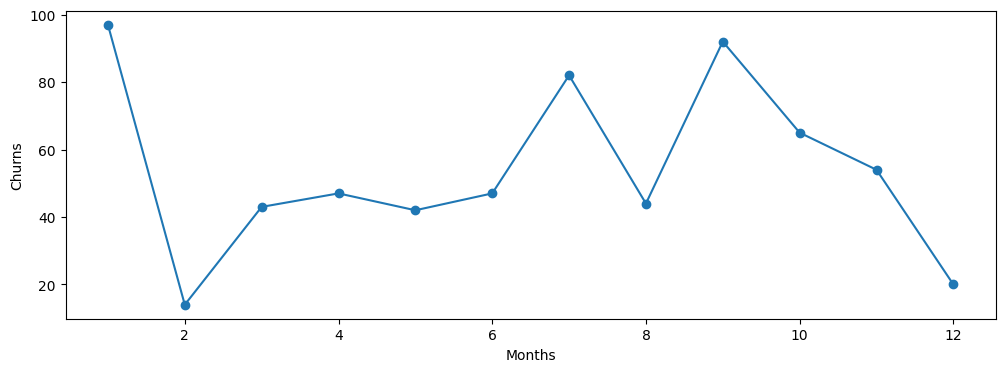

In [31]:
# create an example line chart with a x variable "months" and a random y variable "churns"
months = np.arange(1, 13)
churns = np.random.randint(10, 100, 12)
plt.figure(figsize=(12, 4))
plt.plot(months, churns, 'o-')
plt.xlabel('Months')
plt.ylabel('Churns')


### 2.3. Scatter plots
A scatter plot uses dots to represent values for two different variables, plotted on the X and Y axes.It allows you to observe relationships or correlations, and is often the precursor to line graphs when a pattern persists.

*When to use it:* Scatter plots are perfect for showing relationships between two quantitative variables or displaying the distribution of data. They are handy when you want to highlight the correlation, or lack of any correlation, between two variables.

*Tips:* Use different colors or shapes to represent different categories (this may even uncover natural segments of data not previously known). Adding a trend line can help visualize the overall relationship.

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

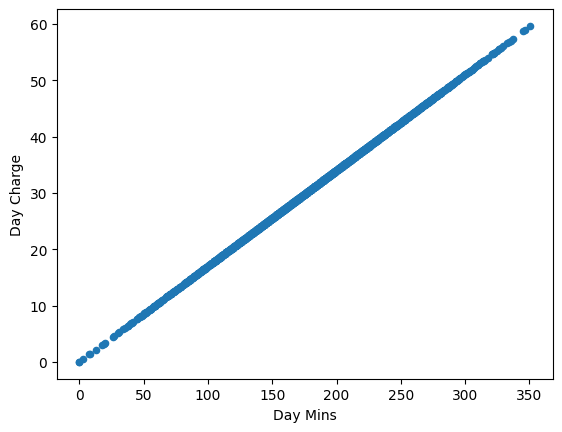

In [32]:
data.plot(kind="scatter",x="Day Mins", y="Day Charge")

### 3.4. Histograms
A histogram is a graphical representation of the distribution of data. It is used to display discrete numeric data, where the bins (or bars) represent ranges of data. It consists of a series of bars, where each bar represents a category or range of values, and the height of the bar represents the frequency or count of observations falling within that category.

*When to use it:* Use histograms to show the distribution of (at least) one numeric variable and identify patterns such as skewness, kurtosis, or outliers.

*Tips:* Be aware that bin size can greatly influence your histogram’s shape and insights. Experiment with different sizes to find the one that best represents your data.

**How to know hoy many bins to use?** --> **STURGE'S RULE:** 

$k = 1 + log_2(M)$, where $M$ is the number of observations.

In [33]:
# sturges rule to calculate the number of bins
n = data.shape[0]  # number of observations
k = int(np.ceil(1 + np.log2(n)))  # number of bins
print(n, k)

3333 13


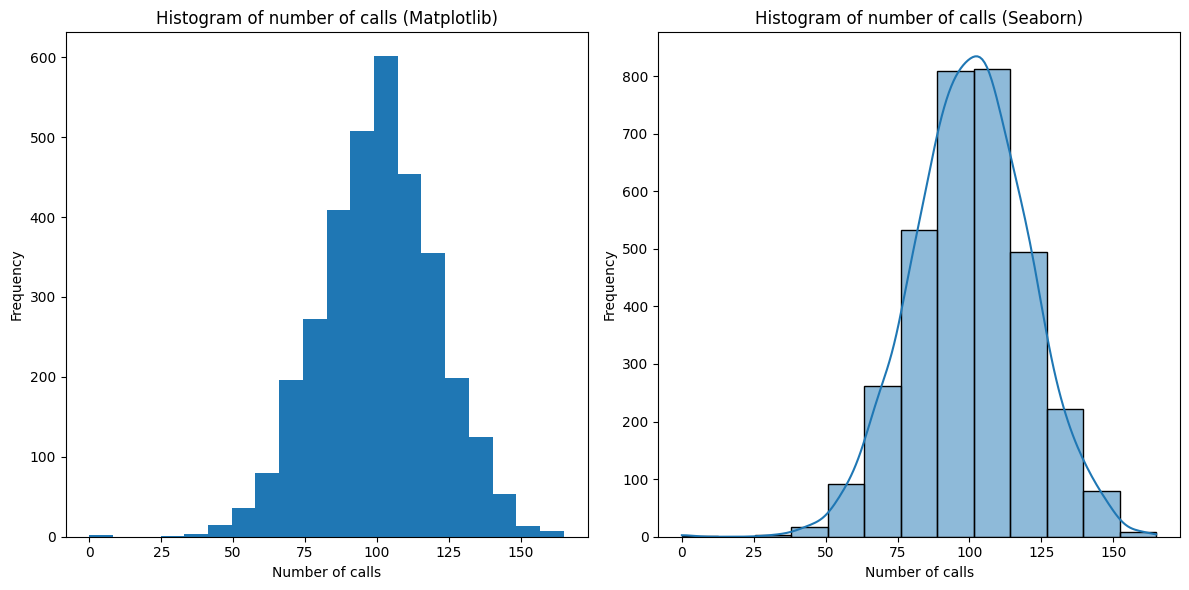

In [34]:
# We can build subplots:
plt.figure(figsize=(12, 6))

# Subplot 1: Histogram with matplotlib
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st position
plt.hist(data["Day Calls"], bins=20)
plt.xlabel('Number of calls')
plt.ylabel('Frequency')
plt.title('Histogram of number of calls (Matplotlib)')

# Subplot 2: Histogram with seaborn
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd position
sns.histplot(data["Day Calls"], bins=k, kde=True)  # kde=True adds a kernel density estimation, see below
plt.xlabel('Number of calls')
plt.ylabel('Frequency')
plt.title('Histogram of number of calls (Seaborn)')

plt.tight_layout()
plt.show()

### 3.5. Density plots
Similarly, a density plot (also known as a kernel density plot) is another visualization method that’s used to display the distribution of numeric data. Unlike histograms, density plots are used to represent the distribution of one or more **continuous variables**.

*Tips:* Similar to the histogram, you can create density plots with more than one variable to compare
variable distributions and skewness.

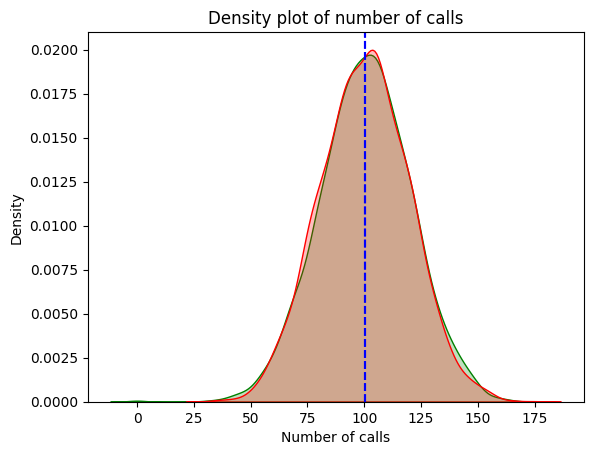

In [35]:
# create a density plot
sns.kdeplot(data["Day Calls"], fill=True, color="g")
plt.xlabel('Number of calls')
plt.ylabel('Density')
plt.title('Density plot of number of calls')
# draw line at the mean
plt.axvline(data["Day Calls"].mean(), color='b', linestyle='--')

# add density plot for another variable
sns.kdeplot(data["Night Calls"], fill=True, color="r")
plt.xlabel('Number of calls')
plt.ylabel('Density')
plt.title('Density plot of number of calls')
# draw line at the mean
plt.axvline(data["Night Calls"].mean(), color='b', linestyle='--')

plt.show()


### 3.6. Quantile-quantile plots (Q-Q plots)

A Q-Q plot is another plot that’s used to assess a dataset’s distribution, typically to compare it to some theoretical distribution (for example, normal distribution). It compares the quantiles of the empirical date from the dataset (along the Y-axis) against the quantiles of the expected theoretical distribution (along the X-axis). The diagonal line in this plot represents where the distributions would match exactly – the closer the scattered dots are to the line, the closer the dataset meets the theoretical distribution.

In the case of the standard normal theoretical distribution, the expected quantiles would portray a mean of 0 and a standard deviation of 1.

*Tips*: When assessing a dataset’s distribution, you may start with a histogram, which can give you some idea of the data’s general distribution. If you are hoping for a normal distribution and the histogram shows that the data is skewed, there’s not much point in using a Q-Q plot. However, if the histogram shows an approximately normal shape, you may use the Q-Q plot to give you a more accurate estimation of the distribution of data since it directly compares your data to the known quantiles of a theoretical distribution.

Text(0.5, 1.0, 'Q-Q plot for Day Calls')

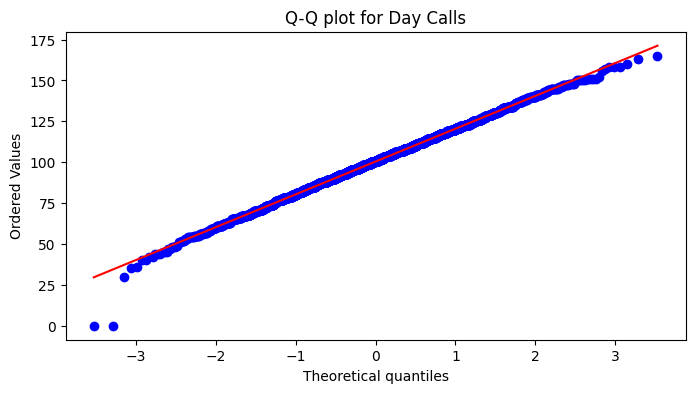

In [36]:
# Q-Q plot for Day Calls
plt.figure(figsize=(8, 4))
stats.probplot(data["Day Calls"], dist="norm", plot=plt)
plt.title('Q-Q plot for Day Calls')


### 3.7 Box plots
A box plot, or box-and-whisker plot, provides a five-number visual summary of a dataset:
* the minimum
* first quartile
* median
* third quartile
* maximum.

*When to use it:* Box plots are great for comparing distributions between different groups or identifying outliers in your dataset. It requires at least one continuous numeric variable, but you can also plot numerous box plots by category. Box plots are better suited for summarizing the central tendency, spread, and identifying outliers, making them useful for comparisons between different variables or groups.

*Tips:* Pair box plots with other plots, such as a swarm plot, to show individual data points and give a more comprehensive view. Swarm plots are box plots overlaid with a scatter plot of the data.

Text(0.5, 1.0, 'Boxplot of daily calls')

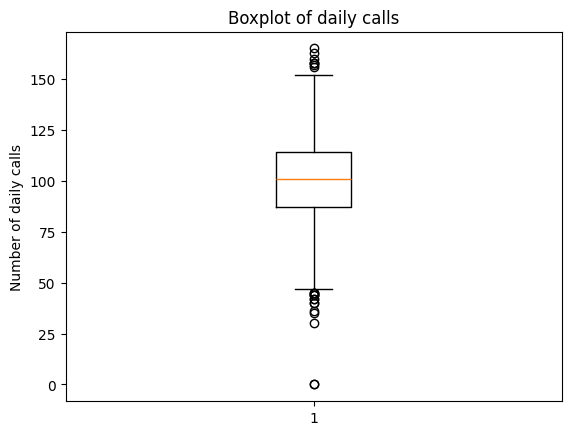

In [93]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Number of daily calls")
plt.title("Boxplot of daily calls")

### 3.8 Pie Charts
A pie chart is a circular graph that represents proportions or percentages among categories, with each slice corresponding to a category, and all category proportions adding up to 100%.

*Tips*: Limit the slices to a manageable number (ideally under seven) to avoid overcomplicating the chart. Label slices with their actual values or percentages for clarity.

([<matplotlib.patches.Wedge at 0x1c01565f550>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(-0.18541023936624987, 0.5706338958896061, '30.0%'),
  Text(-0.27239425980114257, -0.5346039349157352, '45.0%'),
  Text(0.5706339175888016, -0.18541017258299716, '10.0%')])

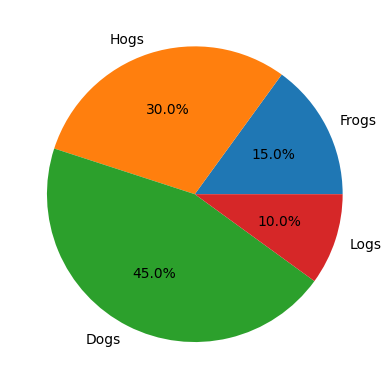

In [37]:
# Create a sample pie chart
sizes = [15, 30, 45, 10]
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

### 3.9 Heatmaps
A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are useful for visualizing complex data, such as matrices, and are often used in exploratory data analysis to identify patterns or relationships between variables.

Helps us find the correlation between numerical features

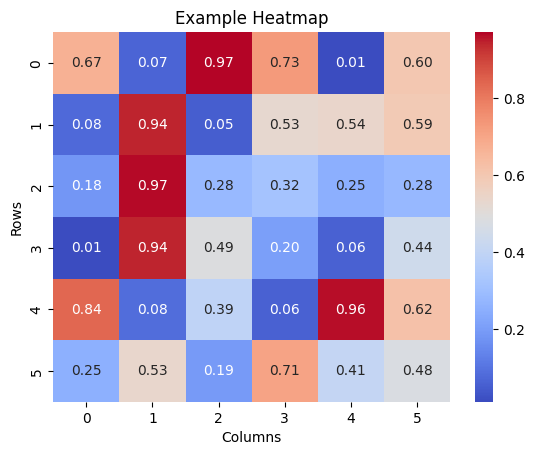

In [38]:
# Generate sample data for the heatmap
data = np.random.rand(6, 6)  # 6x6 matrix with random values

# Create the heatmap
sns.heatmap(data, annot=True, cmap="coolwarm", fmt=".2f")

# Customize the heatmap
plt.title("Example Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Show the heatmap
plt.show()

## 4. Data Subseting and Creation of Sample Data
Data subsetting is the process of creating a subset of data from a larger set of data. This can be done by selecting specific columns or rows, or by filtering the data based on certain conditions. 

Creating a sample or synthetic data set is useful for testing code, building models, or exploring data without working with the entire dataset.


### 4.1. Creating a subset of data

In [39]:
filepath = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filepath)

data = pd.read_csv(fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [40]:
# If we select a single column, we get a pandas Series, not a dataframe 
account_length=data["Account Length"]
print("Selection type: ", type(account_length))  # pandas Series

account_length.head()

Selection type:  <class 'pandas.core.series.Series'>


0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [41]:
# If we select multiple columns, we get a pandas DataFrame, a subset of the original dataset
desired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
subset = data[desired_columns]
print("Selection type: ", type(subset))  # Dealing fith dataframes is easier

Selection type:  <class 'pandas.core.frame.DataFrame'>


The above method of creating a subset is not efficient when we have many columns.

In [42]:
# We can also select columns by excluding the ones we don't want
undesired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
all_columns_list = data.columns.values.tolist()

desired_columns=[x for x in all_columns_list if x not in undesired_columns] # We create a list with the columns not in undesired_columns list
subset2 = data[desired_columns]
subset2.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,45.07,197.4,99,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,27.47,195.5,103,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,41.38,121.2,110,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,50.90,61.9,88,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,28.34,148.3,122,186.9,121,8.41,10.1,3,2.73,3,False.


In [43]:
# Another way of doing this is by using sets
undesired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
a = set(undesired_columns)  # convert the list into a set so we can use set operations
b = set(all_columns_list)

desired_columns = b - a
desired_columns = list(desired_columns)
subset3 = data[desired_columns]
subset3.head()

,Eve Calls,Churn?,Eve Mins,VMail Plan,Intl Calls,VMail Message,Night Calls,Intl Mins,Day Charge,Area Code,Int'l Plan,CustServ Calls,Night Mins,Intl Charge,State,Night Charge,Day Mins
0,99,False.,197.4,yes,3,25,91,10.0,45.07,415,no,1,244.7,2.70,KS,11.01,265.1
1,103,False.,195.5,yes,3,26,103,13.7,27.47,415,no,1,254.4,3.70,OH,11.45,161.6
2,110,False.,121.2,no,5,0,104,12.2,41.38,415,no,0,162.6,3.29,NJ,7.32,243.4
3,88,False.,61.9,no,7,0,89,6.6,50.90,408,yes,2,196.9,1.78,OH,8.86,299.4
4,122,False.,148.3,no,3,0,121,10.1,28.34,415,yes,3,186.9,2.73,OK,8.41,166.7


### 3.2. Create a subset of data with specific conditions

In [44]:
data[1:25]  # Select rows 1 to 24
data[:8]  # Select the first 8 rows (from 0 to 7)
data[60:]  # Select from row 60 to the end

# Selecting rows with a condition
data1 = data[data["Day Mins"]>200]  # Select rows where "Day Mins" > 200
print(data1)

#Usuarios de Nueva York (State = "NY")
data2 = data[data["State"]=="NY"]  # Select rows where "State" = "NY"
print(data2)

#AND-> &
data3 = data[(data["Day Mins"]>300) & (data["State"]=="NY")]  # Select rows where "Day Mins" > 300 and "State" = "NY"

# OR-> |
data4 = data[(data["Day Mins"]>300) | (data["State"]=="NY")]  # Select rows where "Day Mins" > 300 or "State" = "NY"

     State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0       KS             128        415  382-4657         no        yes   
2       NJ             137        415  358-1921         no         no   
3       OH              84        408  375-9999        yes         no   
5       AL             118        510  391-8027        yes         no   
6       MA             121        510  355-9993         no        yes   
...    ...             ...        ...       ...        ...        ...   
3312    SC             181        408  406-6304         no         no   
3322    MD              62        408  409-1856         no         no   
3329    WV              68        415  370-3271         no         no   
3331    CT             184        510  364-6381        yes         no   
3332    TN              74        415  400-4344         no        yes   

      VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
0                25     265.1        110       45.0

EXERCISE:
Get a subset of users that:
* have less of 200 minutes of day calls
* have more of 200 minutes of night calls
* live in the state of NY or OH

Hint:
True and False are 1 and 0 in Python, so you can use > and < operators.

In [45]:
data4 = data[((data["Day Mins"]>200) < (data["Night Mins"] >200)) & (data["State"]=="NY") | (data["State"]=="OH")]
# Note:
# Day Min is smaller than 200 (data["Day Mins"]>200 = False or 0) and Night Mins is greater than 200
data4.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
152,OH,65,408,336-7600,no,no,0,187.9,116,31.94,...,117,13.40,227.3,86,10.23,7.5,6,2.03,1,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.


### 3.3. Create a subset of columns and rows with .iloc and .loc

* **.ix[ ]** is both Label and Integer based slicing technique. Besides pure label based and integer based, Pandas provides a hybrid method for selections and subsetting the object using the ix[] operator. ix[] is the most general indexer and will support any of the inputs in loc[] and iloc[].

* **.loc** gets rows (and/or columns) with particular labels.
* **.iloc** gets rows (and/or columns) at integer locations.

In [46]:
# Pure label based subsetting in pandas
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]

# Pure integer based subsetting in pandas
data.iloc[1:10, 3:6]  # first 10 rows (ignoring the header) and columns 3 to 6
data.iloc[:, 3:6]  # all rows and columns 3 to 6
data.iloc[[1,4,7,32], 3:6]  # rows 1, 4, 7 and 32 and columns 3 to 6

# Mixed subsetting in pandas
data.loc[[1,3,32], ["Area Code", "VMail Plan", "Day Mins"]]  # rows 1, 3 and 32 and columns "Area Code", "VMail Plan", "Day Mins"

# Adding a new column
data["Total Mins"]= data["Day Mins"]+data["Night Mins"]+ data["Eve Mins"]
data.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,False.,611.5


### 3.4. Create a data sample or synthetic data

Random generation is a very useful tool in data science. For example, it can be used to create synthetic data that is useful for testing code, building models, or exploring data without having to work with the entire dataset.

In [47]:
# We can generate a random number between 1 and 100
rand_numbr = np.random.randint(1,100)
print(rand_numbr)

# We can generate a random decimal number between 0 and 1
decrand = np.random.random()
print(decrand)

# We can generate a list of random decimal number between 0 and 1
decrand_list = np.random.random(3)
print(decrand_list)

# We could create a function that generates n random integer numbers in the interval [a,b]
def randint_list(n, a, b):
    x=[]
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

random_list = randint_list(25,1,50)
print(random_list)

# However, this funCtion is not very efficient. We can use a pre-built function in the"random" library

16
0.20116761046774623
[0.09918693 0.00364298 0.27054699]
[46, 39, 21, 37, 1, 44, 5, 1, 47, 41, 42, 45, 45, 47, 8, 37, 35, 17, 45, 31, 22, 23, 39, 11, 6]


In [48]:
rand_numbrs_a = random.randrange(0,100,7)  # Generate random numbers between 0 and 100 that are multiples of 7
rand_numbrs_b =random.randrange(1,100,7)  # Generate random numbers between 1 and 100 that are multiples of 7
print(rand_numbrs_a, rand_numbrs_b)

# We can shuffle a list of numbers
a = np.arange(100)  # creates an array with numbers from 0 to 99 in order
print("Array of 100 numbers of values 0-99: ", a)
arand = np.random.shuffle(a) # shuffles the array randomly
print("Shuffled array: ", arand) # None
print("Shuffled array: ", a) # the array is now shuffled

70 43
Array of 100 numbers of values 0-99:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Shuffled array:  None
Shuffled array:  [88 12 27 92 79 82 70 94 57 43  4 76 25 93 96 90 26 52  7 23 10 40 58 95
 74 97 35 47 68 39 65 84 71 42 56  3 31 53 46  0  2 98 60  5 11 91 61 66
 22 87 30 38 49 32 15 18 73 63 21 75 54  1 36 62 45 99 44 28 59 41 16 86
 19 48 34  8 50 17 83 29 78 20 33 55 69 37 14  9 51 67 13 77 81 80  6 24
 85 64 72 89]


We can use random data generation to create dummy datasets. This is useful for testing and prototyping.

In [49]:
# Create a dataframe with random numbers
n = 1000000
dataF = pd.DataFrame(
    {
         'A': np.random.randn(n),
         'B': 1.5 + 2.5 * np.random.randn(n),
         'C': np.random.uniform(5, 32, n)
     }
)
dataF.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000623,1.495356,18.500651
std,1.000757,2.500181,7.797910
min,-4.771225,-10.421795,5.000045
25%,-0.675918,-0.190737,11.762838
50%,-0.000421,1.496534,18.497882
75%,0.674545,3.182923,25.262278
max,5.111847,13.839602,31.999957


In [50]:
# I can also create a dummy dataset from an existing dataset
column_names = data.columns.values.tolist()
a=len(column_names)
dataF2 = pd.DataFrame(
    {
         'Column name': column_names,
         'A': np.random.randn(a),
         'B': np.random.uniform(0, 1, a)
     }, index = range(42, 42 + a)  # This last thing is to enumerate the rows from 42 to 42+a
)
dataF2.head()

,Column name,A,B
42,State,0.796754,0.568781
43,Account Length,-1.973029,0.203322
44,Area Code,-0.957338,0.907764
45,Phone,0.633383,0.147549
46,Int'l Plan,0.249700,0.057835


## 5. Advanced Data Operations in Python

In [51]:
# Generate a random sample of a dataset to showcase the advanced functions
np.random.seed(1997)  # to make the random numbers reproducible
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

n=500  # Sample size
gender_data = np.random.choice(gender, n)
income_data = np.random.choice(income, n)

height =160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 1800 + 3500 * np.random.randn(n)

data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': income_data,
        'Age': age,
        'Height': height,
        'Weight': weight,
        'Income': income
    }
)

data.head()

,Gender,Economic Status,Age,Height,Weight,Income
0,Female,Middle Class,24.371119,122.530005,79.788976,3545.663750
1,Female,Middle Class,-0.582335,177.275418,79.378832,4462.808649
2,Male,Middle Class,23.761485,165.110084,47.004270,1148.394101
3,Male,Rich,31.721418,168.683619,71.330819,3895.912945
4,Female,Middle Class,24.656468,104.454645,90.925491,-287.471064


### 5.1. Categorical data aggregation (.groupby)

In [52]:
# We can group the data by categorical variables
grouped_gender = data.groupby('Gender')
print(data.nunique())
print(len(grouped_gender))  # 2 groups
grouped_gender.groups

Gender               2
Economic Status      3
Age                500
Height             500
Weight             500
Income             500
dtype: int64
2


{'Female': [0, 1, 4, 7, 10, 13, 14, 17, 18, 19, 21, 22, 25, 28, 31, 32, 33, 34, 36, 37, 38, 39, 43, 45, 47, 49, 50, 51, 53, 55, 56, 57, 58, 59, 60, 61, 64, 68, 69, 70, 71, 72, 73, 74, 80, 82, 85, 86, 87, 88, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 104, 105, 109, 111, 116, 117, 118, 119, 120, 121, 123, 125, 126, 129, 130, 131, 132, 134, 135, 137, 139, 140, 142, 144, 145, 152, 160, 161, 162, 163, 164, 168, 171, 172, 173, 175, 178, 179, 183, 184, ...], 'Male': [2, 3, 5, 6, 8, 9, 11, 12, 15, 16, 20, 23, 24, 26, 27, 29, 30, 35, 40, 41, 42, 44, 46, 48, 52, 54, 62, 63, 65, 66, 67, 75, 76, 77, 78, 79, 81, 83, 84, 89, 91, 98, 102, 103, 106, 107, 108, 110, 112, 113, 114, 115, 122, 124, 127, 128, 133, 136, 138, 141, 143, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 165, 166, 167, 169, 170, 174, 176, 177, 180, 181, 182, 185, 186, 188, 190, 192, 193, 194, 195, 199, 200, 204, 205, 209, 210, 214, ...]}

In [53]:
for name, groups in grouped_gender:  # names is the name of the group and groups is the data of the group
    print("Group: ", name)                     
    print(groups)

Group:  Female
     Gender Economic Status        Age      Height      Weight       Income
0    Female    Middle Class  24.371119  122.530005   79.788976  3545.663750
1    Female    Middle Class  -0.582335  177.275418   79.378832  4462.808649
4    Female    Middle Class  24.656468  104.454645   90.925491  -287.471064
7    Female    Middle Class  43.822079  192.194460   68.123070  3153.292996
10   Female            Rich  43.132026  143.600060   75.494928  1436.929282
..      ...             ...        ...         ...         ...          ...
492  Female    Middle Class  39.547490  181.749912   45.887168   917.079879
495  Female            Poor  13.524122  159.685487   83.001000  1655.728996
496  Female            Rich  46.245805  174.409232  101.939194    97.574270
497  Female            Poor  42.544905  147.228201   39.018045 -2916.129902
498  Female    Middle Class  26.225887  168.310353   69.320737   930.482640

[255 rows x 6 columns]
Group:  Male
    Gender Economic Status        Ag

In [54]:
# I can get the data of a specific group
grouped_gender.get_group('Female')

,Gender,Economic Status,Age,Height,Weight,Income
0,Female,Middle Class,24.371119,122.530005,79.788976,3545.663750
1,Female,Middle Class,-0.582335,177.275418,79.378832,4462.808649
4,Female,Middle Class,24.656468,104.454645,90.925491,-287.471064
7,Female,Middle Class,43.822079,192.194460,68.123070,3153.292996
10,Female,Rich,43.132026,143.600060,75.494928,1436.929282
...,...,...,...,...,...,...
492,Female,Middle Class,39.547490,181.749912,45.887168,917.079879
495,Female,Poor,13.524122,159.685487,83.001000,1655.728996
496,Female,Rich,46.245805,174.409232,101.939194,97.574270
497,Female,Poor,42.544905,147.228201,39.018045,-2916.129902


In [55]:
# We can also group by multiple variables
double_group = data.groupby(["Gender", "Economic Status"])
print(len(double_group))  # We will have 6 groups because there is 2 genders and 3 economic statis.

for names, groups in double_group:
    print(names)
    print(groups)

6
('Female', 'Middle Class')
     Gender Economic Status        Age      Height      Weight       Income
0    Female    Middle Class  24.371119  122.530005   79.788976  3545.663750
1    Female    Middle Class  -0.582335  177.275418   79.378832  4462.808649
4    Female    Middle Class  24.656468  104.454645   90.925491  -287.471064
7    Female    Middle Class  43.822079  192.194460   68.123070  3153.292996
13   Female    Middle Class  22.676511  145.237975   72.335878  2954.360583
..      ...             ...        ...         ...         ...          ...
478  Female    Middle Class  39.039968  151.328731   83.196088  4154.136648
479  Female    Middle Class  31.739836  200.893919  108.818367  2944.267048
488  Female    Middle Class  36.784594  109.667843   66.835632  3319.233589
492  Female    Middle Class  39.547490  181.749912   45.887168   917.079879
498  Female    Middle Class  26.225887  168.310353   69.320737   930.482640

[96 rows x 6 columns]
('Female', 'Poor')
     Gender Econo

In [56]:
# We can also apply functions to the groups  
sum_cat = double_group.sum()  # It sums the ages, heights, weights... of each category
print(sum_cat)

avg_cat = double_group.mean()
print(avg_cat)

size_cat = double_group.size()  # It gives the number of elements in each category 
print(size_cat)

analysis_cat = double_group.describe() # It gives a summary of the data in each category
print(analysis_cat)

group_income = double_group["Income"]  # I can select a specific column
group_income.describe()

                                Age        Height       Weight         Income
Gender Economic Status                                                       
Female Middle Class     2813.709203  15550.327906  6075.940444  133690.502928
       Poor             2682.950353  13226.527392  5225.188790  114146.860663
       Rich             2393.480124  11954.378335  4989.020406  121695.173388
Male   Middle Class     2401.776381  13158.820358  5701.280200  154779.509482
       Poor             2557.998793  12807.868618  5192.344570  125154.188270
       Rich             2450.725317  13412.013764  5597.274363  145897.421347
                              Age      Height     Weight       Income
Gender Economic Status                                               
Female Middle Class     29.309471  161.982582  63.291046  1392.609405
       Poor             31.939885  157.458659  62.204628  1358.891198
       Rich             31.913068  159.391711  66.520272  1622.602312
Male   Middle Class     29

count         mean          std          min  \
Gender Economic Status                                                 
Female Middle Class      96.0  1392.609405  3522.521373 -6524.163027   
       Poor              84.0  1358.891198  3307.717307 -5204.041338   
       Rich              75.0  1622.602312  3679.097235 -8091.834655   
Male   Middle Class      82.0  1887.554994  3322.662073 -6032.411624   
       Poor              79.0  1584.230231  3634.973795 -6916.189617   
       Rich              84.0  1736.874064  3695.725025 -9880.966698   

                               25%          50%          75%           max  
Gender Economic Status                                                      
Female Middle Class    -967.254528  1160.783820  3538.563291  10416.761811  
       Poor            -581.399937  1337.027721  3130.559486   9694.583793  
       Rich            -548.047054  1453.052440  3899.139115   8374.513873  
Male   Middle Class    -452.318174  2207.250373  4145.918605   9214.099083  
       Poor            -911.200960  1854.624848  3635.166004  10581.146146  
       Rich             -42.752014  1452.132447  3959.249894  12098.061805

(array([ 10.,  15.,  39.,  67., 113.,  99.,  94.,  46.,  12.,   5.]),
 array([-5.83270427,  0.89128548,  7.61527522, 14.33926497, 21.06325472,
        27.78724447, 34.51123421, 41.23522396, 47.95921371, 54.68320346,
        61.4071932 ]),
 <BarContainer object of 10 artists>)

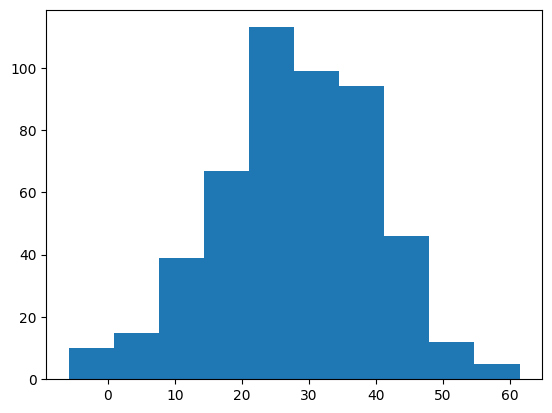

In [57]:
# We can also apply custom functions to the groups
zscore = lambda x: (x - x.mean()/x.std())  # This custom function normalizes the data
data_transform = double_group.transform(zscore)
plt.hist(data_transform["Age"])

Similar to SQL operations, we can group data by category and perform operations on the groups.

In [58]:
grouping_cat = double_group.aggregate(  # I can apply multiple functions to the groups
    {
        "Income": "sum",  # Sums the incomes of each category (fem middle class, fem poor, fem rich, male middle class...)
        "Age": "mean",
        "Height": lambda h:(np.mean(h))/np.std(h)  # I can apply a custom function to the data
    }
)
print(grouping_cat)

# If we want to apply the same functions to ALL the groups
grouping_cat2 = double_group.aggregate(["sum", "mean", "std"])

# We could do the same but with custom functions
grouping_cat3 = double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

                               Income        Age    Height
Gender Economic Status                                    
Female Middle Class     133690.502928  29.309471  5.130731
       Poor             114146.860663  31.939885  5.307884
       Rich             121695.173388  31.913068  5.935219
Male   Middle Class     154779.509482  29.289956  4.711606
       Poor             125154.188270  32.379732  6.188201
       Rich             145897.421347  29.175301  5.865774


In [180]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Age,Height,Weight,Income
0,Female,Middle Class,24.371119,122.530005,79.788976,3545.663750
1,Female,Middle Class,-0.582335,177.275418,79.378832,4462.808649
4,Female,Middle Class,24.656468,104.454645,90.925491,-287.471064
7,Female,Middle Class,43.822079,192.194460,68.123070,3153.292996
10,Female,Rich,43.132026,143.600060,75.494928,1436.929282
...,...,...,...,...,...,...
492,Female,Middle Class,39.547490,181.749912,45.887168,917.079879
495,Female,Poor,13.524122,159.685487,83.001000,1655.728996
496,Female,Rich,46.245805,174.409232,101.939194,97.574270
497,Female,Poor,42.544905,147.228201,39.018045,-2916.129902


We can use the .head(), .tail(), .nth() and .describe() methods with grouped data.

In [59]:
# remember our data
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status        Age      Height      Weight       Income
0    Female    Middle Class  24.371119  122.530005   79.788976  3545.663750
1    Female    Middle Class  -0.582335  177.275418   79.378832  4462.808649
4    Female    Middle Class  24.656468  104.454645   90.925491  -287.471064
7    Female    Middle Class  43.822079  192.194460   68.123070  3153.292996
13   Female    Middle Class  22.676511  145.237975   72.335878  2954.360583
..      ...             ...        ...         ...         ...          ...
478  Female    Middle Class  39.039968  151.328731   83.196088  4154.136648
479  Female    Middle Class  31.739836  200.893919  108.818367  2944.267048
488  Female    Middle Class  36.784594  109.667843   66.835632  3319.233589
492  Female    Middle Class  39.547490  181.749912   45.887168   917.079879
498  Female    Middle Class  26.225887  168.310353   69.320737   930.482640

[96 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

In [60]:
print(" 1) ")
print(double_group.head(1))  # Shows the first value of each group
print(" 2) ")
print(double_group.tail(1))  # Shows the last value of each group
print(" 3) ")
print(double_group.nth(32))  # Shows the 32th value of each group. Caution! the nth value must exist in the group

data_sorted = data.sort_values(["Age", "Income"])  # Sorts the data by age first and then income
age_grouped = data_sorted.groupby("Gender")  # I group the sorted data by gender
print(" 4) ")
print(age_grouped.head(1))  # Shows the youngest man and woman
print(" 5) ")
print(age_grouped.tail(1))  # Shows the oldest man and woman

 1) 
    Gender Economic Status        Age      Height     Weight       Income
0   Female    Middle Class  24.371119  122.530005  79.788976  3545.663750
2     Male    Middle Class  23.761485  165.110084  47.004270  1148.394101
3     Male            Rich  31.721418  168.683619  71.330819  3895.912945
8     Male            Poor  45.425620  147.932522  42.651674 -1790.638178
10  Female            Rich  43.132026  143.600060  75.494928  1436.929282
18  Female            Poor  35.174840  103.370729  59.805268  -393.137446
 2) 
     Gender Economic Status        Age      Height      Weight       Income
493    Male    Middle Class  42.429177  181.089938   36.201132 -2325.952843
494    Male            Poor  24.443429  146.352388   69.425364  1129.725963
496  Female            Rich  46.245805  174.409232  101.939194    97.574270
497  Female            Poor  42.544905  147.228201   39.018045 -2916.129902
498  Female    Middle Class  26.225887  168.310353   69.320737   930.482640
499    Male     

### 5.2. Data concatenation (.concat)

In [61]:
filepath1 = "wine/winequality-red.csv"
fullpath1 = os.path.join(mainpath, filepath1)

filepath2 = "wine/winequality-white.csv"
fullpath2 = os.path.join(mainpath, filepath1)

red_wine = pd.read_csv(fullpath1, sep = ";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
white_wine = pd.read_csv(fullpath2, sep = ";")      
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
print("red wine shape: ", red_wine.shape)  # (rows, columns)
print("white wine shape: ",white_wine.shape)  # (rows, columns)

# We can concatenate the two datasets
# We can do it along one of the 2 axis:
#    * axis = 0 --> horizontal axis
#    * axis = 1 --> vertical axis

wine_data = pd.concat([red_wine, white_wine], axis = 0) # Concatenates the white wine dataset under the red wine dataset
print ("Concatenated shape: ", wine_data.shape)

# We can also concatenate different parts of datasets to form a new one.
# We call this "scrumbling" the data
data1 = wine_data.head(10)
data2 = wine_data[300:310]
data3 = wine_data.tail(10)

wine_scramble = pd.concat([data1, data2, data3], axis = 0)
print("Scrambled dataset shape: ",wine_scramble.shape)

red wine shape:  (1599, 12)
white wine shape:  (1599, 12)
Concatenated shape:  (3198, 12)
Scrambled dataset shape:  (30, 12)


We can concatenate two or more dataframes using the .concat() method. This is useful when we have data in different dataframes that we want to combine into a single dataframe.

In [65]:
# Directory where files are stored
dataset_dir = '../data/distributed-data/'

# List and sort files numerically
files = sorted(
    glob.glob(f"{dataset_dir}/*.csv"),
    key=lambda x: int(os.path.basename(x).split('.')[0])
)

# Process files
dataframes = [pd.read_csv(file) for file in files]
combined_df = pd.concat(dataframes, axis = 0, ignore_index=True)

print(dataframes[0].shape)  # example of the shape of one dataset (rows, columns)
print(combined_df.shape)  # shape of the combined dataset


(1461, 4)
(772087, 4)


### 5.3. Training and testing set splitting

Train Test Split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. Here is how the procedure works:

![Train Test Split](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

We will discuss three methods for splitting a dataset into training and test sets.
* 5.3.1. Using normal distribution
* 5.3.2. Using skilearn library + train_test_split
* 5.3.3. Using skilearn library + shuffle function

In [66]:
mainpath="../data/"
filepath = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filepath)

data = pd.read_csv(fullpath)  

#### 5.3.1. Using normal distribution

Len data:  3333
Len training data:  2592
Len testing data:  741
Len(training data) + len(testing data):  3333


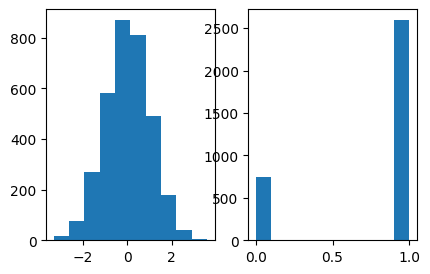

In [67]:
# We can build subplots:
plt.figure(figsize=(10, 3))

# Subplot 1
plt.subplot(1, 4, 1) # 1 row, 2 columns, 1st position
a = np.random.randn(len(data))
plt.hist(a)

# Subplot 2
plt.subplot(1, 4, 2) # 1 row, 2 columns, 2nd position
check = (a<0.8) # Build an array of true or false in function of if a is greater or less than 0.8
check_int = check.astype(int) # Convert the array of true or false to an array of 1 or 0
plt.hist(check_int)

training = data[check] #consideto los training data aquellos que cumplen la condicion del check
testing = data[~check] #considero los datos que no cumolen la condicion de check como los data para el testing

print("Len data: ", len(data))
print("Len training data: ", len(training))
print("Len testing data: ", len(testing))
print("Len(training data) + len(testing data): ", len(training) + len(testing))

#### 5.3.2. Using skilearn library + train_test_split function

In [68]:
# Sklearn has a function that does the same as the previous code
train, test = train_test_split(data, test_size = 0.2) # 80% of the data is for training and 20% for testing

print("Len data: ", len(data))
print("Len training data: ", len(train))
print("Len testing data: ", len(test))
print("Len(training data) + len(testing data): ", len(train) + len(test))

Len data:  3333
Len training data:  2666
Len testing data:  667
Len(training data) + len(testing data):  3333


#### 5.3.3. Using skilearn library + shuffle function + data slicing

In [69]:
data = sklearn.utils.shuffle(data) 
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id + 1 :]

print("Len data: ", len(data))
print("Len training data: ", len(train_data))
print("Len testing data: ", len(test_data))
print("Len(training data) + len(testing data): ", len(train_data) + len(test_data))

Len data:  3333
Len training data:  2499
Len testing data:  833
Len(training data) + len(testing data):  3332


### 5.4. Data merging (.merge) --> Join operations

When working with multiple but related datasets, it is often necessary to combine them into a single dataset. This process is called joining or merging. Pandas provides a merge function to combine datasets based on one or more keys.

We will use some datasets related to athletes and countries to demonstrate how to merge datasets.

Lets consider the following questions:
* Has an athlete won more than one medal?
* Has an athlete competed for more than one country?
* It is possible that an athlete has played for more than one country (because the country was divided or changed its name). How can we correct this?
* Has any athlete competed in more than one sport?

These types of connections can be very useful in data analysis, and join operations are essential for making these connections and extracting insights.

Join types:
* Inner join --> default
* Outer join
    * Left join
    * Right join


<img src="https://www.ionos.com/es-us/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg" width="700" height="400">


In [70]:
# One athlete can appear more than once. How can we know if this is the case?

filepath4 = "athletes/Medals.csv"
fullpath4 = mainpath + filepath4
# ISO-8859-1 is a character encoding standard for the Latin alphabet. We work with utf-8
# so we need to convert the file to utf-8
# ISO-8859-1: is an ISO standard that defines the encoding of the Latin alphabet, 
# including diacritics (such as accented letters, ñ, ç), and special letters (such as ß, Ø), necessary for writing various
# (such as ß, Ø), necessary for the writing of several West European languages. It is also necessary to use the symbol € and others.
# In our file accents and other characters are used, but in this script we are using utf-8 and that's why we have to make this encoding
# to ISO-8859-1, also known as Latin Alphabet #1.
data_main = pd.read_csv(fullpath4, encoding = "ISO-8859-1" )

data_main_dp = data_main.drop_duplicates(subset = "Athlete")  # Returns a dataframe without duplicates in the "Athlete" column
a = data_main["Athlete"].unique().tolist()  # Returns a list with the names of the athletes without repeating.
b = data_main.shape[0] # Number of rows in the original dataset

print("Athletes' names: %d  " % (len(a)))
print("Number of rows in the original dataset %d " %(b))

data_main.head()

Athletes' names: 6956  
Number of rows in the original dataset 8618 


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [71]:
# It is possible that an athlete has played for more than one country (because the country was divided or changed its name). How can we correct this?
# How do we deal with this?

filepath5 = "athletes/Athelete_Country_Map.csv"
fullpath5 = mainpath + filepath5
data_country = pd.read_csv(fullpath5, encoding = "ISO-8859-1" )

# One case of this is Aleksandar Ciric. Let's look for him:
print(data_country [data_country["Athlete"] == "Aleksandar Ciric"])
data_country.head()

               Athlete                Country
1029  Aleksandar Ciric                 Serbia
1086  Aleksandar Ciric  Serbia and Montenegro


,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [72]:
# Has any athlete competed in more than one sport?

filepath6 = "athletes/Athelete_Sports_Map.csv"
fullpath6 = mainpath + filepath6
data_sports = pd.read_csv(fullpath6, encoding = "ISO-8859-1" )

a = data_main["Athlete"].unique().tolist()  # Returns a list with the names of the athletes without repeating.
b = data_sports.shape[0]

print("filas data_main: %d  " % (len(a)))
print("filas data_sports %d " %(b))
print(b > len(a))  # If true there are athletes who have competed in more than one sport

# Some of these athletes I know and I will show them:
print(data_sports [(data_sports["Athlete"] == "Chen Jing") |
                   (data_sports["Athlete"] == "Richard Thompson") |
                   (data_sports["Athlete"] == "Matt Ryan")                
                   ]) 

data_sports.head()

filas data_main: 6956  
filas data_sports 6975 
True
               Athlete         Sport
528   Richard Thompson     Athletics
1308         Chen Jing    Volleyball
1419         Chen Jing  Table Tennis
2727         Matt Ryan        Rowing
5003         Matt Ryan    Equestrian
5691  Richard Thompson      Baseball


,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


Now we will see the types of joins that can be done with the pandas merge function.

We will use the "athlete" column as the key to merge the data_main and data_country datasets.

In [73]:
data_main_country = pd.merge (left = data_main,
                              right = data_country,
                              left_on = "Athlete",
                              right_on = "Athlete") # Inner join by default

print("rows data_main %d " %(len(data_main)))
print("rows data_country %d " %(len(data_country)))
print("rows data_main_country %d " %(len(data_main_country)))

data_main_country.head()

rows data_main 8618 
rows data_country 6970 
rows data_main_country 8657 


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [74]:
# When making the join increases the number of rows because there are athletes who have played in 
# several countries or in several years and they get duplicated, let's see the example of Aleksandar Ciric.
data_main_country [data_main_country["Athlete"] == "Aleksandar Ciric"]  # serbia = serbia and montenegro --> we have duplicated data

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [75]:
# In this case we can eliminate the duplicates
# we first eliminate the duplicates in the Athlete column in the country dataset
data_country_dp = data_country.drop_duplicates(subset = "Athlete")

# We can check that the main dataset without duplicates has the same number of rows as the country dataset without duplicates:
print(len(data_country)==len(data_country_dp))
print(len(data_country_dp)==len(a))

# We now merge the main dataset with the country dataset without duplicates
data_main_country_dp = pd.merge (left = data_main, right = data_country_dp,
                              left_on = "Athlete", right_on = "Athlete")

print("rows data_main %d " %(len(data_main)))
print("rows data_country %d " %(len(data_country_dp)))
print("rows data_main_country %d " %(len(data_main_country_dp)))
data_main_country.head()

False
True
rows data_main 8618 
rows data_country 6956 
rows data_main_country 8618 


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [76]:
# We could also add a column with the sports of each athlete.
data_sports_dp = data_sports.drop_duplicates(subset = "Athlete") # we only want one row per athlete. We delete the duplicates due to the second country.

# Check that main without duplicates has the same number of rows as country without duplicates:
print(len(data_sports)==len(data_sports_dp))
print(len(data_sports_dp)==len(a))

# We merge the main dataset with the sports dataset without duplicates
data_final = pd.merge (left = data_main_country, right = data_sports_dp,
                              left_on = "Athlete", right_on = "Athlete")
data_final.head()

False
True


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


Lets get to action! Joins with the pandas merge function: inner, left, right, outer.

In [77]:
# To showcase the use of joins, I will delete some country data from the country dataset

# I randomly select 6 countries to delete from the country dataset but whithout repeating any country
out_athletes = np.random.choice(data_main["Athlete"], size = 6, replace = False)

# I build an array with the athletes that are not in the out_athletes array and that arent Michael Phelps
data_country_dlt = data_country_dp
[
    (~data_country_dp["Athlete"].isin( out_athletes)) &
    (data_country_dp["Athlete"] != "Michael Phelps")
]

print(data_country_dlt.head())
print("data country:")
print(len(data_country_dlt))
print(len(data_country_dp))

            Athlete        Country
0    Michael Phelps  United States
1  Natalie Coughlin  United States
2     Aleksey Nemov         Russia
3     Alicia Coutts      Australia
4    Missy Franklin  United States
data country:
6956
6956


In [78]:
# Now we do the same with the sports and main datasets
data_sports_dlt = data_sports_dp
[
    (~data_sports_dp["Athlete"].isin( out_athletes)) &
    (data_sports_dp["Athlete"] != "Michael Phelps")
]

print("data sports:")
print(len(data_sports_dlt))
print(len(data_sports_dp))

data_main_dlt = data_main_dp
[
    (~data_main_dp["Athlete"].isin( out_athletes)) &
    (data_main_dp["Athlete"] != "Michael Phelps")
]

print("data main:")
print(len(data_main_dlt))
print(len(data_main_dp))

data sports:
6956
6956
data main:
6956
6956


In [79]:
# JOINING THE NEW DATASETS
merged_inner = pd.merge(
    left = data_main_dp,
    right = data_country_dlt,
    how = "inner",
    left_on = "Athlete",
    right_on = "Athlete")

print("INNER- len data_ main_dp: %d , len data_ country_dlt: %d  y len merged_inner: %d"  %(len (data_main_dp) , len(data_country_dlt), len(merged_inner)))

merged_left = pd.merge(
    left = data_main_dp,
    right = data_country_dlt,
    how = "left",
    left_on = "Athlete",
    right_on = "Athlete")

print("LEFT - len data_ main: %d , len data_ country_dlt: %d  y len merged_left: %d"  %(len (data_main_dp) , len(data_country_dlt), len(merged_left)))

merged_right = pd.merge(
    left = data_main_dlt,
    right = data_country_dp,
    how = "right",
    left_on = "Athlete",
    right_on = "Athlete")

print("RIGHT - len data_ main_dlt: %d , len data_ country_dlt: %d  y len merged_right: %d"  %(len (data_main_dlt) , len(data_country_dp), len(merged_right)))

INNER- len data_ main_dp: 6956 , len data_ country_dlt: 6956  y len merged_inner: 6956
LEFT - len data_ main: 6956 , len data_ country_dlt: 6956  y len merged_left: 6956
RIGHT - len data_ main_dlt: 6956 , len data_ country_dlt: 6956  y len merged_right: 6956


In [80]:
# To showcase the outer join, I will add a new athlete to the data_country_dlt dataset
data_country_dlt_teresa = data_country_dlt.copy()
data_country_dlt_teresa.loc[len(data_country_dlt)] = ["Teresa Lobo", "Spain"]

merged_outer = pd.merge(
    left = data_main,
    right = data_country_dlt_teresa,
    how = "outer",
    left_on = "Athlete",
    
    right_on = "Athlete")

print("OUTER - len data_ main: %d , len data_ country_dlt_teresa: %d  y len merged_outert: %d"  %(len (data_main) , len(data_country_dlt_teresa), len(merged_outer)))
data_country_dlt_teresa.tail()

OUTER - len data_ main: 8618 , len data_ country_dlt_teresa: 6956  y len merged_outert: 8619


,Athlete,Country
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany
6969,Rod White,United States
